# Plot OOS data for events 

Plot the grace a and champ out of sample data for specefic events

In [2]:
#plot matplotlib figures in the notebook
%matplotlib inline

#auto reload modules before executing
%load_ext autoreload
%autoreload 2

#print all output in a cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import os, sys
import pickle

In [4]:
sdate = '2008-03-06'
edate = '2008-03-20'

In [5]:
def oos_dat(ddir = 'D:/data/SatDensities/',
            dmod = ['SI','FI','FI_GEO']):
    """
    Function to return the out of sample datasets from rf_model( )

    ----------
    
    None
    
    ddir: str
        file directory for data

    Returns
    -------
    os_df : Pandas DataFrame
        DataFrame with the out of sample data for each model.

    """  
    # create empty data frames for returning 
    oos_a = pd.DataFrame( )
    oos_b = pd.DataFrame( )

    # read in the data
    for mod in dmod:
        
        with open(ddir+f'{mod}_RFdat.pkl','rb') as f:
            print(f)
            dat_a, dat_b = pickle.load(f)[4:]
            dat_a = dat_a[['400kmDensity', '400kmDensity_pred', 'DateTime', 
                           'storm','storm phase']]
            dat_a['Model'] = mod
            dat_b = dat_b[['400kmDensity', '400kmDensity_pred', 'DateTime', 
                           'storm','storm phase']]
            dat_b['Model'] = mod
    
        oos_a = pd.concat([oos_a,dat_a])
        oos_b = pd.concat([oos_b,dat_b])

    # calculate residuals
    oos_a['resid'] = oos_a['400kmDensity'] - oos_a['400kmDensity_pred']
    oos_b['resid'] = oos_b['400kmDensity'] - oos_b['400kmDensity_pred']
    
    return oos_a, oos_b

In [6]:
#read in data
oos_ga, oos_ch = oos_dat( ) # grace A and CHAMP out of sample data

<_io.BufferedReader name='D:/data/SatDensities/SI_RFdat.pkl'>
<_io.BufferedReader name='D:/data/SatDensities/FI_RFdat.pkl'>
<_io.BufferedReader name='D:/data/SatDensities/FI_GEO_RFdat.pkl'>


In [7]:
#define the data subsets
ga_si = oos_ga['Model'] == 'SI' # solar model
ga_fi = oos_ga['Model'] == 'FI' # FISM model
ga_fg = oos_ga['Model'] == 'FI_GEO' # FISM/GEO model

ch_si = oos_ch['Model'] == 'SI' # solar model
ch_fi = oos_ch['Model'] == 'FI' # FISM model
ch_fg = oos_ch['Model'] == 'FI_GEO' # FISM/GEO model

ga_si = oos_ga[(oos_ga['Model'] == 'SI') & (oos_ga['DateTime'] > sdate) & (oos_ga['DateTime'] < edate)].sort_values(by='DateTime') # solar model
ga_fi = oos_ga[(oos_ga['Model'] == 'FI') & (oos_ga['DateTime'] > sdate) & (oos_ga['DateTime'] < edate)].sort_values(by='DateTime') # solar model
ga_fg = oos_ga[(oos_ga['Model'] == 'FI_GEO') & (oos_ga['DateTime'] > sdate) & (oos_ga['DateTime'] < edate)].sort_values(by='DateTime') # solar model

In [8]:
sat_df = pd.read_hdf("D:/data/SatDensities/satdrag_database_grace_CHAMP.hdf5")
sat_df.columns
sat_df['SatDensity'] = sat_df['SatDensity']*(10**12)

Index(['DateTime', 'DateTime_omni', 'B', 'Bx_GSEGSM', 'By_GSE', 'Bz_GSE',
       'By_GSM', 'Bz_GSM', 'Vsw', 'Vx_GSE', 'Vy_GSE', 'Vz_GSE', 'Prho', 'Tp',
       'dynP', 'Esw', 'AE', 'AL', 'AU', 'SYM_D index', 'SYM_H index',
       'ASY_D index', 'ASY_H index', 'PC index', 'Goes Proton flux (>10 MeV)',
       'Goes Proton flux (>30 MeV)', 'Goes Proton flux (>60 MeV)',
       'DateTime_fism2', '225_00', '600_01', '1300_02', '2500_03', '5100_04',
       '11250_05', '18950_06', '25700_07', '30500_08', '43000_09', '59500_10',
       '72400_11', '72400_12', '85550_13', '85550_14', '85550_15', '94400_16',
       '94400_17', '94400_18', '98100_19', '100700_20', '103850_21',
       '113000_22', 'DateTime_si', 'F10', 'F81', 'S10', 'S81c', 'M10', 'M81c',
       'Y10', 'Y81c', 'DateTime_gr', 'CenterLat', 'SatLat', 'SatLon',
       'SatHeight', 'SatLT', 'SatDipoleLat', 'SatMagLon', 'SatMagLT',
       'SatDensity', '400kmDensity', '410kmDensity', 'NRLMSISe00atSat',
       'DenUncertainty', 'NumPts', '

In [9]:
#add read_io module to current path ()
file_path = 'D:\\GitHub\\DataIO\\'
sys.path.append(os.path.dirname(file_path))

# import data input/output module
import data_io as dio

# read omni data and truncate data to similar range as grace data
om_d, om_m = dio.load_omni(res='5m',sdate=sdate, nd=2)


In [10]:
om_d.columns
om_m

Index(['DateTime', 'IMF_id', 'SW_id', 'IMF_pt', 'SW_pt', 'Per_int',
       'Timeshift', 'RMS_Timeshift', 'RMS_PhaseFrontNormal',
       'Time_btwn_observations', 'B', 'Bx_GSEGSM', 'By_GSE', 'Bz_GSE',
       'By_GSM', 'Bz_GSM', 'RMS_SD_B', 'RMS_SD_field_vector', 'Vsw', 'Vx_GSE',
       'Vy_GSE', 'Vz_GSE', 'Prho', 'Tp', 'dynP', 'Esw', 'Beta', 'AlfvenMach',
       'X(s/c), GSE', 'Y(s/c), GSE', 'Z(s/c), GSE', 'BSN location, Xgse',
       'BSN location, Ygse', 'BSN location, Zgse', 'AE', 'AL', 'AU',
       'SYM_D index', 'SYM_H index', 'ASY_D index', 'ASY_H index', 'PC index',
       'Na_Np Ratio', 'MagnetosonicMach', 'Goes Proton flux (>10 MeV)',
       'Goes Proton flux (>30 MeV)', 'Goes Proton flux (>60 MeV)'],
      dtype='object')

{'description': 'Omni2 data from https://spdf.gsfc.nasa.gov/pub/data/omni/high_res_omni/\n    Description and units at https://omniweb.gsfc.nasa.gov/html/omni_min_data.html#4b\n            ',
 'res': '5m',
 'files':                                         fname  fexists
 0  D:\data\OMNI\YEARLY_5MIN\omni_5min2008.asc     True
 1  D:\data\OMNI\YEARLY_5MIN\omni_5min2009.asc     True}

<Axes: xlabel='DateTime', ylabel='Vsw - km/s'>

<Axes: ylabel='$\\mathregular{P_{dyn}}$ - nPa'>

<Axes: xlabel='DateTime', ylabel='$\\mathregular{B_{z}}$ - nT'>

<Axes: xlabel='DateTime', ylabel='Sym-H - nT'>

<Axes: xlabel='DateTime', ylabel='AE - nT'>

C:\Users\krmurph1\AppData\Local\Temp\ipykernel_13804\268295010.py:21: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Model'], dtype='object')
  ga_fg.rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax[4], label='Obs', ylabel='Density', legend=True, ylim=(0,3))


<Axes: xlabel='DateTime', ylabel='Density'>

C:\Users\krmurph1\AppData\Local\Temp\ipykernel_13804\268295010.py:22: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Model'], dtype='object')
  ga_fg.rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[4], label='FISM/GEO', ylabel='Density', legend=True, ylim=(0,2))


<Axes: xlabel='DateTime', ylabel='Density'>

C:\Users\krmurph1\AppData\Local\Temp\ipykernel_13804\268295010.py:23: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Model'], dtype='object')
  ga_fi.rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[4], label='FISM', ylabel='Density', legend=True, ylim=(0,2),alpha=0.5)


<Axes: xlabel='DateTime', ylabel='Density'>

ValueError: invalid on specified as DateTime, must be a column (of DataFrame), an Index or None

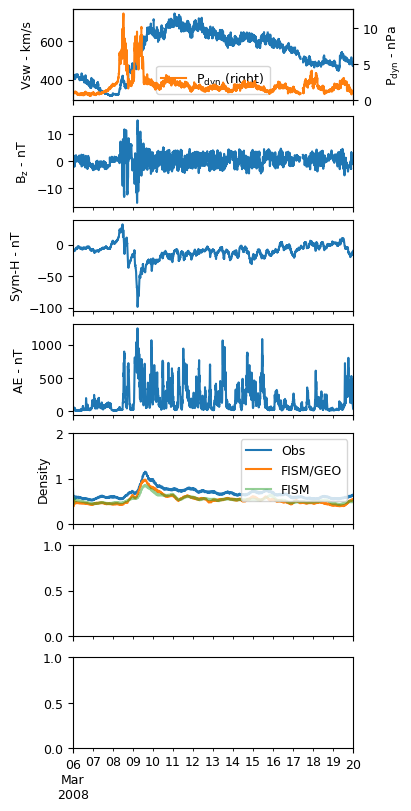

In [20]:
plt.rcParams.update({'font.size': 9})
fig, ax = plt.subplots(7,1,figsize=(4,8),sharex=True, layout='constrained')

#define good times for plotting
om_gd = (om_d['DateTime'] > sdate) & (om_d['DateTime'] <= edate)
ga_gd = (oos_ga['DateTime'] > sdate) & (oos_ga['DateTime'] <= edate)
ch_gd = (oos_ch['DateTime'] > sdate) & (oos_ch['DateTime'] <= edate)
sat_gd = (sat_df['DateTime'] > sdate) & (sat_df['DateTime'] <= edate)


om_d[om_gd].plot(x='DateTime', y='Vsw', xlim=[sdate,edate], ax=ax[0], label='Vsw', ylabel='Vsw - km/s', legend=False)
om_d[om_gd].plot(x='DateTime', y='dynP', xlim=[sdate,edate], ax=ax[0], label='$\mathregular{P_{dyn}}$', ylabel='$\mathregular{P_{dyn}}$ - nPa', legend=True, secondary_y=True)
om_d[om_gd].plot(x='DateTime', y='Bz_GSM', xlim=[sdate,edate], ax=ax[1], label='SW Bz', ylabel='$\mathregular{B_{z}}$ - nT', legend=False)
om_d[om_gd].plot(x='DateTime', y='SYM_H index', xlim=[sdate,edate], ax=ax[2], label='Sym-H', ylabel='Sym-H - nT', legend=False)
om_d[om_gd].plot(x='DateTime', y='AE', xlim=[sdate,edate], ax=ax[3], label='AE', ylabel='AE - nT', legend=False)

#ga_fg.plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax[4], label='Obs', ylabel='Density', legend=True, ylim=(0,3))
#ga_fg.plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[4], label='FISM/GEO', ylabel='Density', legend=True, ylim=(0,2))
#ga_fi.plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[4], label='FISM', ylabel='Density', legend=True, ylim=(0,2),alpha=0.5)

ga_fg.rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax[4], label='Obs', ylabel='Density', legend=True, ylim=(0,3))
ga_fg.rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[4], label='FISM/GEO', ylabel='Density', legend=True, ylim=(0,2))
ga_fi.rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[4], label='FISM', ylabel='Density', legend=True, ylim=(0,2),alpha=0.5)

ch_fg.rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax[5], label='Obs', ylabel='Density', legend=True, ylim=(0,3))
ch_fg.rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[5], label='FISM/GEO', ylabel='Density', legend=True, ylim=(0,2))
ch_fi.rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[5], label='FISM', ylabel='Density', legend=True, ylim=(0,2),alpha=0.5)

sat_df[sat_gd].plot(x='DateTime', y='SatDensity', xlim=[sdate,edate], ax=ax[6])
#sat_df[sat_gd].plot(x='DateTime', y='SatHeight', xlim=[sdate,edate], ax=ax[6])


#ga_si.plot(x='DateTime', y='resid', xlim=[sdate,edate], ax=ax[5], label='Solar', ylabel='Density', legend=True, ylim=(0,2),alpha=0.75)
#oos_ga[ga_fi].plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[4], label='FISM', legend=True)
#oos_ga[ga_fg].plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[4], label='FISM/Geo', legend=True)
#oos_ga[ga_si].plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[4], label='Solar', legend=True)

fig.draw

C:\Users\krmurph1\AppData\Local\Temp\ipykernel_13804\140051348.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Model'], dtype='object')
  ga_fg.rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], label='Obs', ylabel='Density', legend=True, ylim=(0,3))


<Axes: xlabel='DateTime', ylabel='Density'>

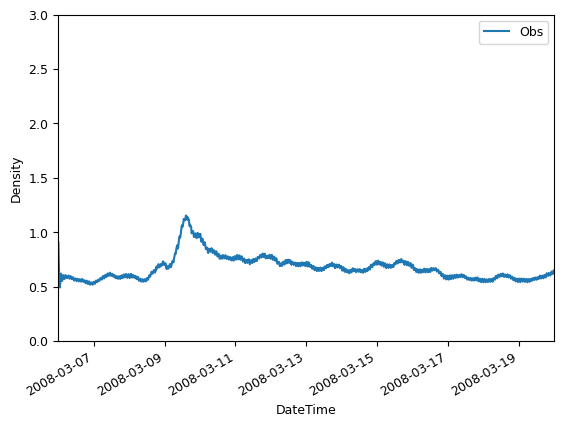

In [18]:
ga_fg.rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], label='Obs', ylabel='Density', legend=True, ylim=(0,3))

In [13]:
oos_ga.head()

,400kmDensity,400kmDensity_pred,DateTime,storm,storm phase,Model,resid
144,1.718468,3.923744,2002-08-01 12:00:00,1,1,SI,-2.205276
432,5.095914,5.118535,2002-08-02 12:00:00,1,2,SI,-0.022621
720,5.487530,5.628141,2002-08-03 12:00:00,1,2,SI,-0.140611
1008,2.116747,4.432567,2002-08-04 12:00:00,1,2,SI,-2.315820
1296,1.730111,2.653699,2002-08-05 12:00:00,-1,-1,SI,-0.923588
